In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


import tensorflow as tf
from utils.helper import fn_plot_tf_hist

In [2]:
###------------------------------
### global variables
##-----------------
RANDOM_STATE = 24
np.random.RandomState(seed = RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE) # set_seed in tf
rng= np.random.default_rng(seed= RANDOM_STATE)

N_SAMPLE  = 1000
NOISE = .2
ALPHA = .1
TEST_SIZE = .2
EPOCHS = 200 #NO. of itersation used to optimize weights
# input and output directories

params = {'legend.fontsize' : 'medium', 
          'figure.figsize' : (15, 4),
          'axes.labelsize' : 'medium',
          'axes.titlesize' : 'large',
          'xtick.labelsize' : 'medium',
          'ytick.labelsize' : 'medium',
         }
loss_hist = {} # creating an empty dictionary which will store loss and epoch later so that we can make loss curve later

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm

# plt.style.use('seaborn-v0_8-darkgrid')

plt.style.use('ggplot')

In [3]:
## Machine specific code

# physical_device = tf.config.list_physical_devices('GPU')

# if len(physical_device) >0:
    # tf.config.experimental.set_memory_growth(physical_device[0],True)


In [4]:
X, y = datasets.make_moons(n_samples = N_SAMPLE, # n_samples: how many datasets in it
                          noise = NOISE, # peportion of randommness added to data so that it matched to real life data , without noise it becomes perfect half circle in moon dataset
                          shuffle = True, 
                          random_state = RANDOM_STATE)
X.shape, y.shape

((1000, 2), (1000,))

In [5]:
X_train, X_test, y_train, y_test=   train_test_split(X,y , random_state= RANDOM_STATE, stratify=y, test_size= TEST_SIZE)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

- tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    lora_rank=None,
    **kwargs
)

In [7]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(2,)), # input layer ,units=no of neurons =2 
    # we can also activate in another line
    tf.keras.layers.Dense(5,activation ='relu', name= 'fc_1'), # no of neurons=5, name= fully connected layer, not mandatory , just for naming
    # no link is broken between layers so they are called fully connected layers
    tf.keras.layers.Dense(5,activation ='relu', name= 'fc_2'), # no of neurons=5
    tf.keras.layers.Dense(4,activation ='relu', name= 'fc_3'), # no of neurons=4
    tf.keras.layers.Dense(3,activation ='relu', name= 'fc_4'), # no of neurons=3
    tf.keras.layers.Dense(2, name= 'Output') # no of neurons=2 , no activation as it is output layer ## if no activation is applied (ie. "linear" activation: a(x) = x).
    
])

In [8]:
prediction= model(X_train[:1]).numpy() # just for checking
prediction.sum()

0.0

In [9]:
tf.nn.softmax(prediction).numpy().sum()

1.0

In [10]:
# - weights 2*5 

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ fc_1 (Dense)                    │ (None, 5)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_2 (Dense)                    │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_3 (Dense)                    │ (None, 4)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc_4 (Dense)                    │ (None, 3)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92 (368.00 B)

 Trainable params: 92 (368.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
tf.keras.utils.plot_model(model, "my_first_model.png")

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [13]:
# define loss function
#criterias: on what we are defining loss , 
#sparse means: input is column vector, 
#check y and y_pred same or not
# from_logits = True means i did not put sigmoid or softmax at the last layer, google will automatically handle it.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [14]:
loss_fn(y_train[:1], prediction).numpy()

0.6931472

In [15]:
#for classification : metrics = accuracy
model.compile(optimizer = 'adam', loss= loss_fn, metrics= ['accuracy'])

In [16]:
# model fitting 
# supply x, y and validation data , at each epoch check how model is doing on validation

history =  model.fit(x= X_train, y=y_train, validation_data= [X_test, y_test], epochs= EPOCHS)

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.5178 - loss: 0.6906 - val_accuracy: 0.5000 - val_loss: 0.6835
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5180 - loss: 0.6813 - val_accuracy: 0.7600 - val_loss: 0.6675
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7194 - loss: 0.6640 - val_accuracy: 0.7700 - val_loss: 0.6435
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7499 - loss: 0.6377 - val_accuracy: 0.7650 - val_loss: 0.6195
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7945 - loss: 0.6112 - val_accuracy: 0.8200 - val_loss: 0.5949
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8426 - loss: 0.5846 - val_accuracy: 0.8300 - val_loss: 0.5684
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8378 - loss: 0.5579 - val_accuracy: 0.8350 - val_loss: 0.5420
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8513 - loss: 0.5295 - val_accuracy: 0.8350 - 

In [18]:
# keep eye on loss , epoch after epoch it should go down , no harm at one or two places
# trainng loss goes up then problem
# even spikes come then check your model
# validation loss coming up then we think it is overfitting
# like if we keep epoch =2000 here then overfitting

In [19]:
history.history.keys() # tensor flow output is a dictionary, here: history.history, history is object
# .history is an attribute of history 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [20]:
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api_export_path',
 '_api_export_symbol_id',
 '_model',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params']

In [21]:
history.history  
#dictionary

{'accuracy': [0.5,
  0.5024999976158142,
  0.737500011920929,
  0.7475000023841858,
  0.7987499833106995,
  0.8412500023841858,
  0.8424999713897705,
  0.8537499904632568,
  0.8600000143051147,
  0.8650000095367432,
  0.8687499761581421,
  0.8712499737739563,
  0.8737499713897705,
  0.8762500286102295,
  0.875,
  0.8762500286102295,
  0.8774999976158142,
  0.8774999976158142,
  0.8774999976158142,
  0.8762500286102295,
  0.8762500286102295,
  0.8774999976158142,
  0.8762500286102295,
  0.8774999976158142,
  0.8774999976158142,
  0.8787500262260437,
  0.8787500262260437,
  0.8799999952316284,
  0.8799999952316284,
  0.8787500262260437,
  0.8799999952316284,
  0.8799999952316284,
  0.8787500262260437,
  0.8774999976158142,
  0.8774999976158142,
  0.8774999976158142,
  0.8812500238418579,
  0.8812500238418579,
  0.8799999952316284,
  0.8812500238418579,
  0.8812500238418579,
  0.8812500238418579,
  0.8824999928474426,
  0.8824999928474426,
  0.8824999928474426,
  0.8849999904632568,
  0.8

,accuracy,loss,val_accuracy,val_loss
0,0.50000,0.688509,0.500,0.683549
1,0.50250,0.676695,0.760,0.667539
2,0.73750,0.656298,0.770,0.643463
3,0.74750,0.629739,0.765,0.619540
4,0.79875,0.604119,0.820,0.594924


<Axes: >

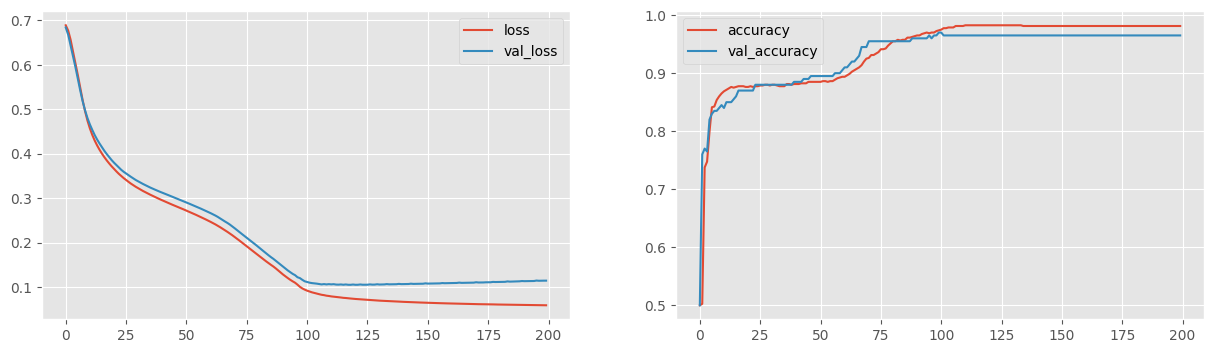

In [22]:
hist_df= pd.DataFrame(history.history)
display(hist_df.head())
fig, ax = plt.subplots(1,2)

# the required plot
hist_df.plot(y= ['loss','val_loss'], ax= ax[0])
hist_df.plot(y= ['accuracy','val_accuracy'], ax= ax[1])

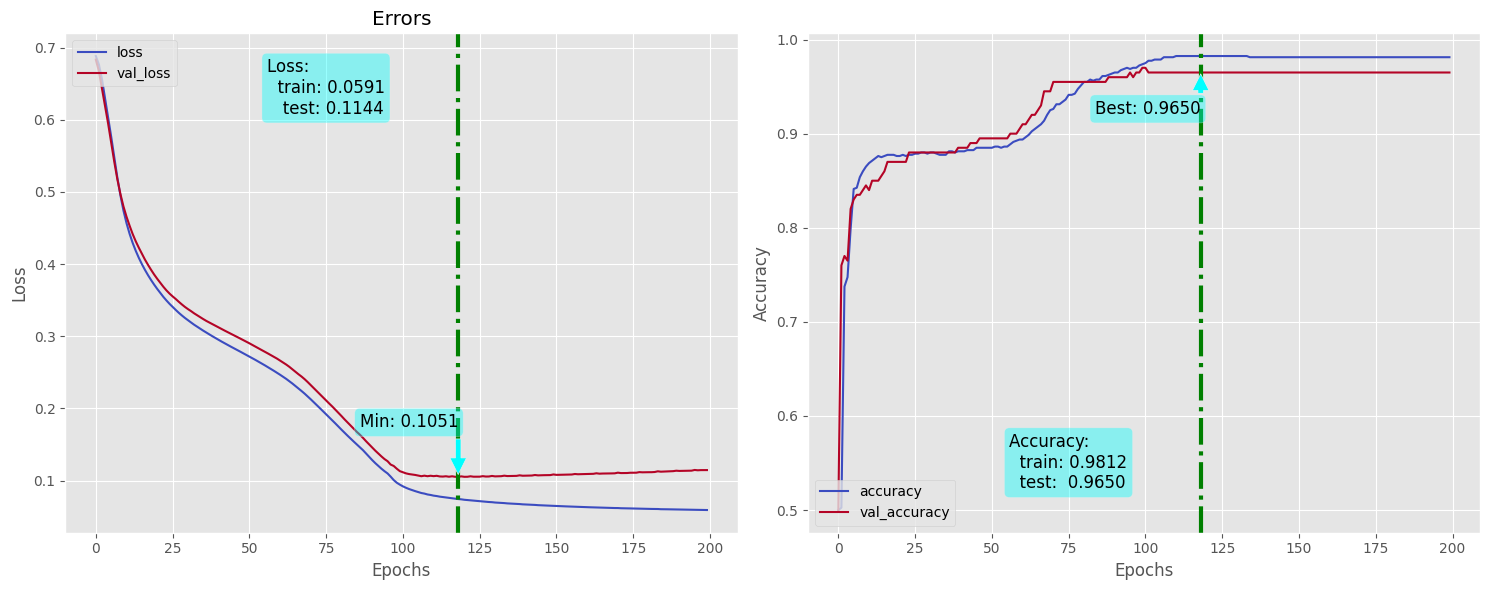

In [23]:
fn_plot_tf_hist(hist_df=hist_df) #Using function

### - model retains the weights from the last epoch, even if those weights do not correspond to the highest validation accuracy.

In [25]:
y_pred = model.predict(X_train)
accuracy_score(y_train, y_pred.argmax(axis=1))

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


0.98125

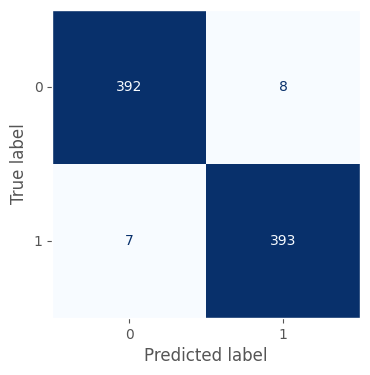

In [26]:
cm = confusion_matrix(y_train, y_pred.argmax(axis=1))
plost = ConfusionMatrixDisplay(cm, display_labels = [0,1])
fig, ax = plt.subplots(figsize = (4,4))

plost.plot(ax = ax, cmap = 'Blues', colorbar = False)
ax.grid(False)

In [27]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred.argmax(axis = 1))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


0.965

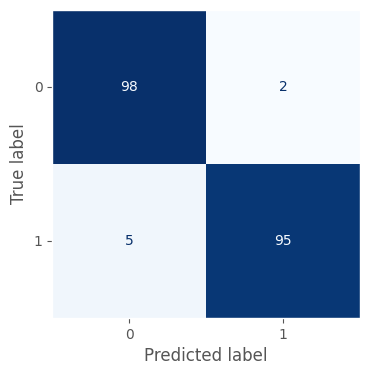

In [28]:
cm = confusion_matrix(y_test, y_pred.argmax(axis = 1))
plat = ConfusionMatrixDisplay(cm, display_labels = [0, 1])
fig, ax =plt.subplots(figsize = (4,4))

plat.plot(ax = ax, cmap = 'Blues', colorbar = False)
ax.grid(False)